In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# email classification
# 0-> Personel , 1-> Work email

In [4]:
df = pd.read_csv("9-email_classification_svm.csv")

In [5]:
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [6]:
 df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [9]:
df.isnull().sum()

subject_formality_score      0
sender_relationship_score    0
email_type                   0
dtype: int64

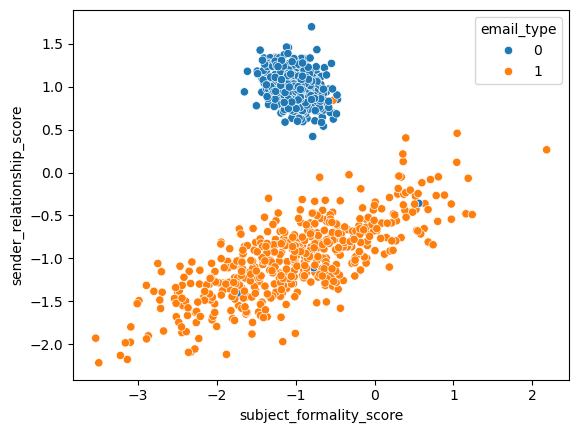

In [10]:
sns.scatterplot(x=df["subject_formality_score"],y=df["sender_relationship_score"],hue=df["email_type"])
plt.show()

In [11]:
df["email_type"].value_counts()

email_type
0    502
1    498
Name: count, dtype: int64

In [12]:
X = df.drop("email_type",axis=1)
y= df["email_type"]

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 825 to 811
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    250 non-null    float64
 1   sender_relationship_score  250 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [20]:
from sklearn.svm import SVC

In [21]:
svc = SVC(kernel="linear")

In [22]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
y_pred = svc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report , confusion_matrix

In [27]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   0]
 [  1 132]]


In [29]:
df = pd.read_csv("9-loan_risk_svm.csv")

In [30]:
df.head()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1


In [31]:
df.describe()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
count,1000.000000,1000.000000,1000.000000
mean,-0.024200,-0.018748,0.504000
std,1.257080,1.222329,0.500234
min,-3.562160,-2.641815,0.000000
25%,-1.001007,-0.995190,0.000000
50%,-0.105200,-0.142727,1.000000
75%,1.007451,0.964210,1.000000
max,2.984892,3.338639,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fluctuation   1000 non-null   float64
 1   recent_transaction_volume  1000 non-null   float64
 2   loan_risk                  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [33]:
df.isnull().sum()

credit_score_fluctuation     0
recent_transaction_volume    0
loan_risk                    0
dtype: int64

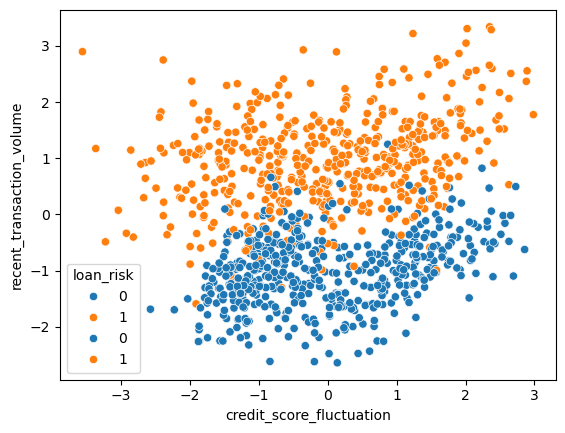

In [36]:
sns.scatterplot(x=df["credit_score_fluctuation"],y=df["recent_transaction_volume"],hue=df["loan_risk"])
plt.show()

In [37]:
X= df.drop("loan_risk",axis=1)
y = df["loan_risk"]

In [38]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [40]:
linear = SVC(kernel="linear")
linear.fit(X_train,y_train)""
y_pred3 = linear.predict(X_test)
print(classification_report(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       118
           1       0.93      0.91      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[109   9]
 [ 12 120]]


In [41]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred4 = rbf.predict(X_test)
print(classification_report(y_pred4,y_test))
print(confusion_matrix(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       124
           1       0.91      0.94      0.93       126

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113  11]
 [  8 118]]


In [42]:
poly = SVC(kernel="poly")
poly.fit(X_train,y_train)
y_pred5 = poly.predict(X_test)
print(classification_report(y_pred5,y_test))
print(confusion_matrix(y_pred5,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       115
           1       0.94      0.90      0.92       135

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107   8]
 [ 14 121]]


In [43]:
sigmoid = SVC(kernel="sigmoid")
sigmoid.fit(X_train,y_train)
y_pred6 = sigmoid.predict(X_test)
print(classification_report(y_pred6,y_test))
print(confusion_matrix(y_pred6,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       118
           1       0.84      0.83      0.84       132

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 98  20]
 [ 23 109]]


In [44]:
#hyperparameter tuning

In [45]:
SVC()

SVC()

In [50]:
param_grid = {
    "C" : [0.1,1,10,100],
    "kernel" : ["rbf","linear","poly"],
    "gamma" : ["scale","auto"]
}

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5)

In [53]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [54]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [55]:
y_pred7 = grid.predict(X_test)
print(classification_report(y_pred7,y_test))
print(confusion_matrix(y_pred7,y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       122
           1       0.92      0.93      0.93       128

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[112  10]
 [  9 119]]


In [56]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [57]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   underground_wave_energy   400 non-null    float64
 1   vibration_axis_variation  400 non-null    float64
 2   seismic_event_detected    400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


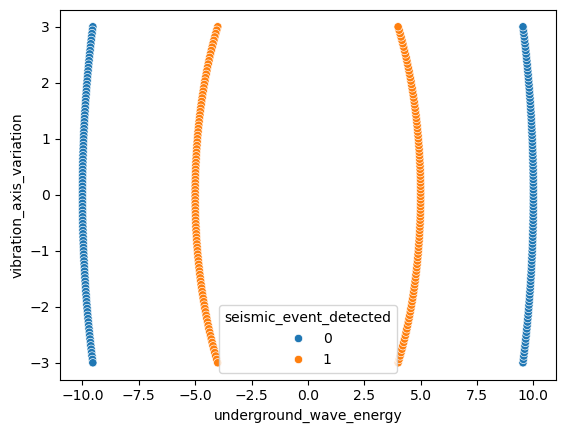

In [59]:
sns.scatterplot(x=df["underground_wave_energy"],y=df["vibration_axis_variation"],hue=df["seismic_event_detected"])
plt.show()

In [60]:
#manual rbf kernel

In [61]:
df.columns

Index(['underground_wave_energy', 'vibration_axis_variation',
       'seismic_event_detected'],
      dtype='object')

In [63]:
df["underground_wave_energy **2"] = df["underground_wave_energy"] **2
df["vibration_axis_variation **2"] =  df["vibration_axis_variation"] **2
df["underground_wave_energy*vibration_axis_variation"] = (df["underground_wave_energy"]*df["vibration_axis_variation"])

In [64]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected,underground_wave_energy **2,vibration_axis_variation **2,underground_wave_energy*vibration_axis_variation
0,9.539392,-3.000000,0,91.000000,9.000000,-28.618176
1,9.558241,-2.939394,0,91.359963,8.640037,-28.095434
2,9.576669,-2.878788,0,91.712580,8.287420,-27.569197
3,9.594678,-2.818182,0,92.057851,7.942149,-27.039548
4,9.612272,-2.757576,0,92.395776,7.604224,-26.506569


In [67]:
X = df.drop("seismic_event_detected",axis=1)
y = df["seismic_event_detected"]

In [68]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [79]:
import plotly.express as px

In [80]:
fig = px.scatter_3d(df,x="underground_wave_energy **2",y="vibration_axis_variation **2",z="underground_wave_energy*vibration_axis_variation",color = "seismic_event_detected")

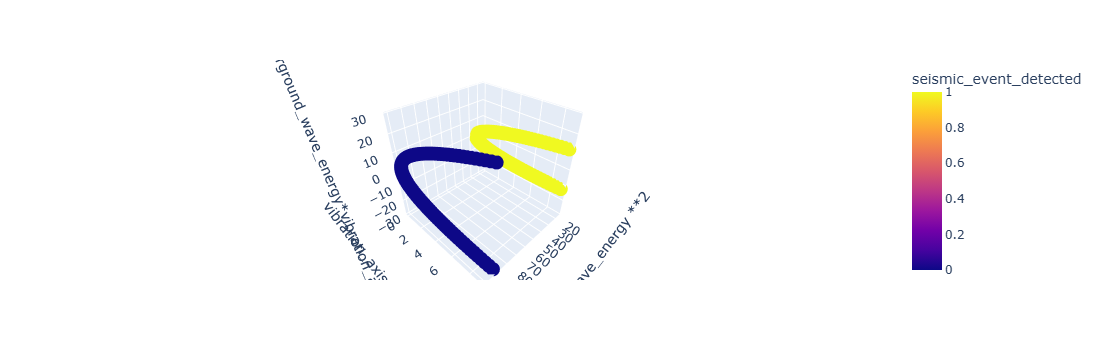

In [81]:
fig.show()

In [82]:
linear  = SVC(kernel = "linear")
linear.fit(X_train,y_train)
y_pred8 = linear.predict(X_test)
print(classification_report(y_pred8,y_test))
print(confusion_matrix(y_pred8,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]


In [83]:
#automatic 

In [94]:
df = pd.read_csv("9-seismic_activity_svm.csv")

In [95]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


In [96]:
X= df.drop("seismic_event_detected",axis=1)
y = df["seismic_event_detected"]

In [93]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [98]:
linear  = SVC(kernel = "linear")
linear.fit(X_train,y_train)
y_pred9 = linear.predict(X_test)
print(classification_report(y_pred9,y_test))
print(confusion_matrix(y_pred9,y_test))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       100
           1       0.00      0.00      0.00         0

    accuracy                           0.48       100
   macro avg       0.50      0.24      0.32       100
weighted avg       1.00      0.48      0.65       100

[[48 52]
 [ 0  0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [100]:
rbf  = SVC(kernel = "rbf")
rbf.fit(X_train,y_train)
y_pred10 = rbf.predict(X_test)
print(classification_report(y_pred10,y_test))
print(confusion_matrix(y_pred10,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]
